In [21]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [64]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import pickle

In [65]:
# Mount Google Drive
def mount_drive():
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully.")

In [66]:
# Read data from CSV
def read_data():
    data_path = '/content/drive/MyDrive/Data-processed/crop_recommendation.csv'
    df = pd.read_csv(data_path)
    return df

In [67]:
# Separate features and target
def separate_features_target(df):
    features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    target = df['label']
    return features, target


In [68]:
# Split data into train and test sets
def split_data(features, target):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=0.2, random_state=2)
    return Xtrain, Xtest, Ytrain, Ytest

In [69]:
# Train and evaluate Decision Tree model
def decision_tree(Xtrain, Xtest, Ytrain, Ytest, features, target):
    DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
    DecisionTree.fit(Xtrain, Ytrain)
    predicted_values = DecisionTree.predict(Xtest)
    accuracy = metrics.accuracy_score(Ytest, predicted_values)
    print("DecisionTree's Accuracy is: ", accuracy * 100)
    print(classification_report(Ytest, predicted_values))
    score = cross_val_score(DecisionTree, features, target, cv=5)
    print("Cross-validation score (Decision Tree):", score)
    save_model(DecisionTree, 'DecisionTree')
    return DecisionTree, accuracy

In [70]:
# Train and evaluate Logistic Regression model
def logistic_regression(Xtrain, Xtest, Ytrain, Ytest, features, target):
    LogReg = LogisticRegression(random_state=2)
    LogReg.fit(Xtrain, Ytrain)
    predicted_values = LogReg.predict(Xtest)
    accuracy = metrics.accuracy_score(Ytest, predicted_values)
    print("Logistic Regression's Accuracy is: ", accuracy)
    print(classification_report(Ytest, predicted_values))
    score = cross_val_score(LogReg, features, target, cv=5)
    print("Cross-validation score (Logistic Regression):", score)
    save_model(LogReg, 'LogisticRegression')
    return LogReg, accuracy

In [71]:
# Train and evaluate Random Forest model
def random_forest(Xtrain, Xtest, Ytrain, Ytest, features, target):
    RF = RandomForestClassifier(n_estimators=20, random_state=0)
    RF.fit(Xtrain, Ytrain)
    predicted_values = RF.predict(Xtest)
    accuracy = metrics.accuracy_score(Ytest, predicted_values)
    print("Random Forest's Accuracy is: ", accuracy)
    print(classification_report(Ytest, predicted_values))
    score = cross_val_score(RF, features, target, cv=5)
    print("Cross-validation score (Random Forest):", score)
    save_model(RF, 'RandomForest')
    return RF, accuracy

In [72]:
# Train and evaluate Support Vector Machine (SVM) model
def support_vector_machine(Xtrain, Xtest, Ytrain, Ytest, features, target):
    norm = MinMaxScaler().fit(Xtrain)
    X_train_norm = norm.transform(Xtrain)
    X_test_norm = norm.transform(Xtest)
    SVM = SVC(kernel='poly', degree=3, C=1)
    SVM.fit(X_train_norm, Ytrain)
    predicted_values = SVM.predict(X_test_norm)
    accuracy = metrics.accuracy_score(Ytest, predicted_values)
    print("SVM's Accuracy is: ", accuracy)
    print(classification_report(Ytest, predicted_values))
    score = cross_val_score(SVM, features, target, cv=5)
    print("Cross-validation score (SVM):", score)
    save_model(SVM, 'SVM')
    return SVM, accuracy

In [73]:
# Save trained model
def save_model(model, model_name):
    model_path = f'/content/drive/MyDrive/models/{model_name}.pkl'
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)
    print(f"{model_name} model saved successfully.")

In [74]:
# Main function
def main():
    mount_drive()
    df = read_data()
    features, target = separate_features_target(df)
    Xtrain, Xtest, Ytrain, Ytest = split_data(features, target)
    acc = []
    model = []

    DecisionTree, accuracy = decision_tree(Xtrain, Xtest, Ytrain, Ytest, features, target)
    acc.append(accuracy)
    model.append('Decision Tree')

    SVM, accuracy = support_vector_machine(Xtrain, Xtest, Ytrain, Ytest, features, target)
    acc.append(accuracy)
    model.append('Support Vector Machine')

    LogReg, accuracy = logistic_regression(Xtrain, Xtest, Ytrain, Ytest, features, target)
    acc.append(accuracy)
    model.append('Logistic Regression')

    RF, accuracy = random_forest(Xtrain, Xtest, Ytrain, Ytest, features, target)
    acc.append(accuracy)
    model.append('Random Forest')

    plt.figure(figsize=[10, 5], dpi=100)
    plt.title('Accuracy Comparison')
    plt.xlabel('Accuracy')
    plt.ylabel('Algorithm')
    sns.barplot(x=acc, y=model, palette='dark')

    accuracy_models = dict(zip(model, acc))
    for k, v in accuracy_models.items():
        print(k, '-->', v)

    return DecisionTree, NaiveBayes, SVM, LogReg, RF

Mounted at /content/drive
Google Drive mounted successfully.
DecisionTree's Accuracy is:  90.68181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.82      0.90        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.74      0.95      0.83        21
       mango       1.00      0.92      0.96        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00    

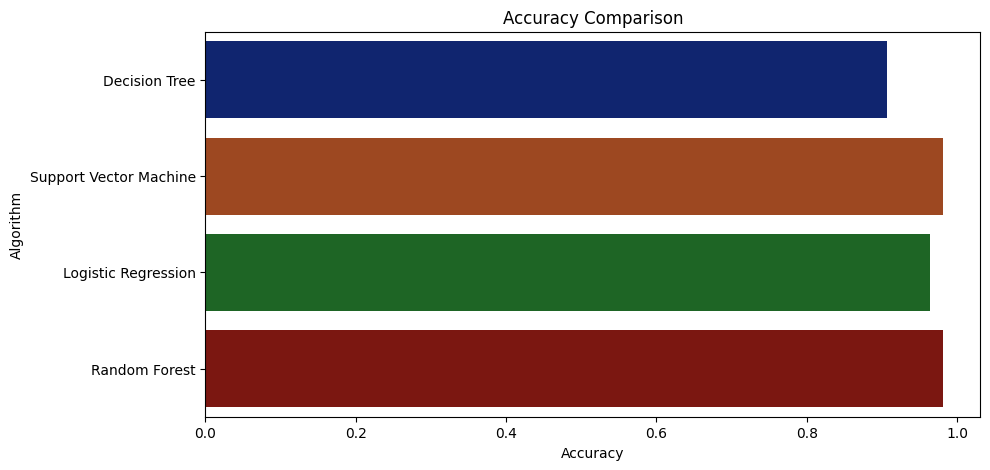

In [75]:
if __name__ == "__main__":
    DecisionTree, NaiveBayes, SVM, LogReg, RF = main()

In [76]:
# Make predictions
data = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = DecisionTree.predict(data)
print("Prediction for data (Decision Tree):", prediction)

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = DecisionTree.predict(data)
print("Prediction for data (Decision Tree):", prediction)

data = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = SVM.predict(data)
print("Prediction for data (SVM):", prediction)

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = SVM.predict(data)
print("Prediction for data (SVM):", prediction)

data = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = LogReg.predict(data)
print("Prediction for data (Logistic Regression):", prediction)

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = LogReg.predict(data)
print("Prediction for data (Logistic Regression):", prediction)

data = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print("Prediction for data (Random Forest):", prediction)

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print("Prediction for data (Random Forest):", prediction)

Prediction for data (Decision Tree): ['coffee']
Prediction for data (Decision Tree): ['jute']
Prediction for data (SVM): ['rice']
Prediction for data (SVM): ['apple']
Prediction for data (Logistic Regression): ['coffee']
Prediction for data (Logistic Regression): ['jute']
Prediction for data (Random Forest): ['coffee']
Prediction for data (Random Forest): ['coffee']
